### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
# data augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255, # Like Normalization (0 : 1) 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(r'dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [3]:
training_set.image_shape

(64, 64, 3)

### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

# test_set_path = os.path.join('dataset', 'test_set')
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [5]:
test_set.image_shape

(64, 64, 3)

## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , activation='relu' ,
                               input_shape = [64,64,3]))

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2) , strides=2 ))

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2) , strides=2 ))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
# We add dropout layer to reduce overfitting
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dropout (Dropout)           (None, 6272)              0

### Step 4 - Full Connection

In [61]:
cnn.add(tf.keras.layers.Dense(units=128 , activation='relu'))

### Step 5 - Output Layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=1 , activation='sigmoid'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dropout (Dropout)           (None, 6272)              0

## Part 3 - Training the CNN

### Compiling the CNN

In [16]:
cnn.compile(optimizer='adam' , loss='binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [17]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
250/250 [==============================] - 160s 635ms/step - loss: 0.6561 - accuracy: 0.6020 - val_loss: 0.6104 - val_accuracy: 0.6765
Epoch 2/20
250/250 [==============================] - 36s 143ms/step - loss: 0.5951 - accuracy: 0.6845 - val_loss: 0.5573 - val_accuracy: 0.7245
Epoch 3/20
250/250 [==============================] - 39s 155ms/step - loss: 0.5566 - accuracy: 0.7143 - val_loss: 0.5329 - val_accuracy: 0.7340
Epoch 4/20
250/250 [==============================] - 41s 165ms/step - loss: 0.5222 - accuracy: 0.7412 - val_loss: 0.5059 - val_accuracy: 0.7585
Epoch 5/20
250/250 [==============================] - 40s 159ms/step - loss: 0.5053 - accuracy: 0.7495 - val_loss: 0.4985 - val_accuracy: 0.7645
Epoch 6/20
250/250 [==============================] - 41s 164ms/step - loss: 0.4805 - accuracy: 0.7728 - val_loss: 0.4832 - val_accuracy: 0.7850
Epoch 7/20
250/250 [==============================] - 39s 157ms/step - loss: 0.4774 - accuracy: 0.7639 - val_loss: 0.4521 - val_a

In [21]:
cnn.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
model_history = cnn.history.history

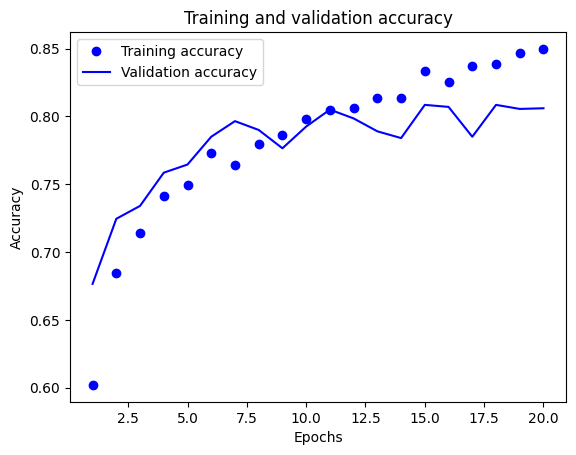

In [27]:
import matplotlib.pyplot as plt

# Plotting accuracy vs. validation accuracy
epochs = range(1, len(model_history['accuracy']) + 1)

plt.plot(epochs, model_history['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, model_history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Part 4 - Making a single prediction

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras.utils as image

In [24]:


test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg' , target_size=(64,64))


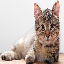

In [25]:
test_image

In [26]:
test_image = image.img_to_array(test_image)

In [27]:
test_image.shape

(64, 64, 3)

In [28]:
test_image = np.expand_dims(test_image , axis=0)

In [29]:
test_image.shape

(1, 64, 64, 3)

In [50]:
result = cnn.predict(test_image/255)

1/1 [==============================] - 0s 77ms/step


In [51]:
result

array([[0.09210654]], dtype=float32)

In [52]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [53]:
if result[0][0] > 0.5:
    print('dog')
else:
    print('cat')

cat


# save the model

In [28]:
cnn.save('my_cnn_model.h5')

# Try Transfer learning

In [10]:
from tensorflow.keras.applications import VGG16

In [11]:
conv_base = VGG16(weights ='imagenet',
      include_top = False, #to drop The Dense layers
      input_shape = (64,64,3))

In [12]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [13]:
tf_model  = tf.keras.models.Sequential()

In [14]:
tf_model.add(conv_base)
tf_model.add(tf.keras.layers.Flatten())
tf_model.add(tf.keras.layers.Dense(units=128 , activation='relu'))
tf_model.add(tf.keras.layers.Dense(units=1 , activation='sigmoid'))

In [15]:
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,977,089
Trainable params: 14,977,089
Non-trainable params: 0
_________________________________________________________________


In [16]:
conv_base.trainable =False #is a statement that freezes the weights of the convolutional base part of a neural network

In [17]:
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,977,089
Trainable params: 262,401
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input


# data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(r'dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
training_set.image_shape
### Preprocessing the Test set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# test_set_path = os.path.join('dataset', 'test_set')
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [19]:
tf_model.compile(optimizer='adam' , loss='binary_crossentropy', metrics = ['accuracy'])

tf_model.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
250/250 [==============================] - 211s 843ms/step - loss: 1.1174 - accuracy: 0.7961 - val_loss: 0.3981 - val_accuracy: 0.8360
Epoch 2/20
250/250 [==============================] - 202s 809ms/step - loss: 0.3356 - accuracy: 0.8556 - val_loss: 0.3698 - val_accuracy: 0.8540
Epoch 3/20
250/250 [==============================] - 175s 700ms/step - loss: 0.2964 - accuracy: 0.8769 - val_loss: 0.3559 - val_accuracy: 0.8645
Epoch 4/20
250/250 [==============================] - 186s 745ms/step - loss: 0.2613 - accuracy: 0.8876 - val_loss: 0.3595 - val_accuracy: 0.8610
Epoch 5/20
250/250 [==============================] - 187s 749ms/step - loss: 0.2415 - accuracy: 0.8984 - val_loss: 0.3739 - val_accuracy: 0.8630
Epoch 6/20
250/250 [==============================] - 195s 779ms/step - loss: 0.2299 - accuracy: 0.9062 - val_loss: 0.3677 - val_accuracy: 0.8710
Epoch 7/20
250/250 [==============================] - 178s 710ms/step - loss: 0.2114 - accuracy: 0.9104 - val_loss: 0.4158 -

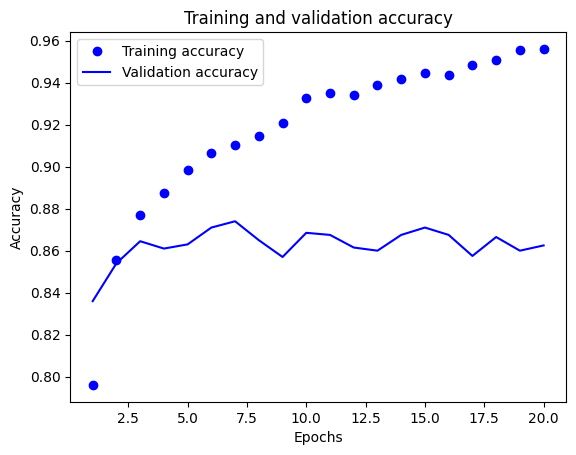

In [20]:

model_history = tf_model.history.history
import matplotlib.pyplot as plt

# Plotting accuracy vs. validation accuracy
epochs = range(1, len(model_history['accuracy']) + 1)

plt.plot(epochs, model_history['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, model_history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## The model is overfit, we can reduce that by many methods like removing the augmented data or added drop out layer or making regularization ...etc

### But we don't make this for now 

# Interpreting model decisions

In [3]:
from tensorflow.keras.models import load_model

model = load_model('my_cnn_model.h5')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dropout (Dropout)           (None, 6272)              0

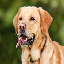

In [37]:

test_image = image.load_img('dataset\single_prediction\cat_or_dog_1.jpg' , target_size=(64,64))

test_image



In [38]:
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [39]:
test_image = np.expand_dims(test_image , axis=0)
test_image.shape

(1, 64, 64, 3)

In [12]:
model.layers[3].output

<KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d_1')>

In [22]:
layer_output = [layer.output for layer in model.layers[:4]]

In [23]:
model.input

<KerasTensor: shape=(None, 64, 64, 3) dtype=float32 (created by layer 'conv2d_input')>

In [24]:
from tensorflow.keras import models
# Creates a model that will return these outputs, given the model input(test_image)
activ_model = models.Model(inputs=model.input , outputs = layer_output)

In [25]:
activ_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable

In [49]:
network_output = activ_model.predict(test_image/255)

1/1 [==============================] - 0s 27ms/step


In [50]:
len(network_output)

4

In [58]:
network_output[0].shape

(1, 62, 62, 32)

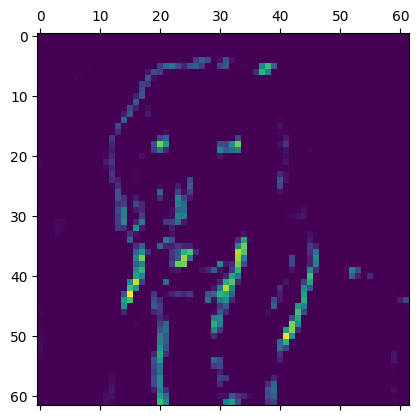

In [62]:
plt.matshow(network_output[0][0, : , : , 29] , cmap='viridis')

## feature map for first layer:

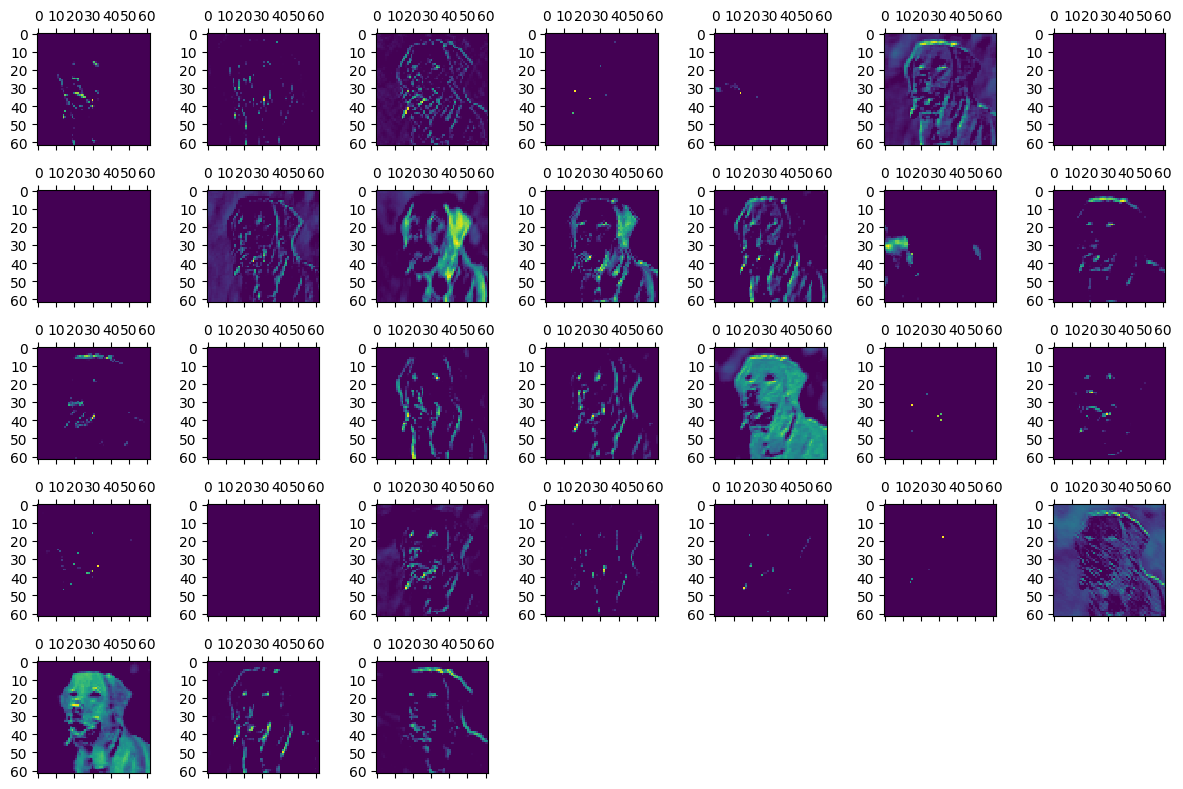

In [64]:
num_channels = 31  # Assuming you want to display 31 channels
num_rows = 5  # Number of rows in the grid
num_cols = 7  # Number of columns in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < num_channels:
        ax.matshow(network_output[0][0, :, :, i], cmap='viridis')
    else:
        ax.axis('off')  # Turn off the empty subplots

plt.tight_layout()
plt.show()

## feature map for last layer:

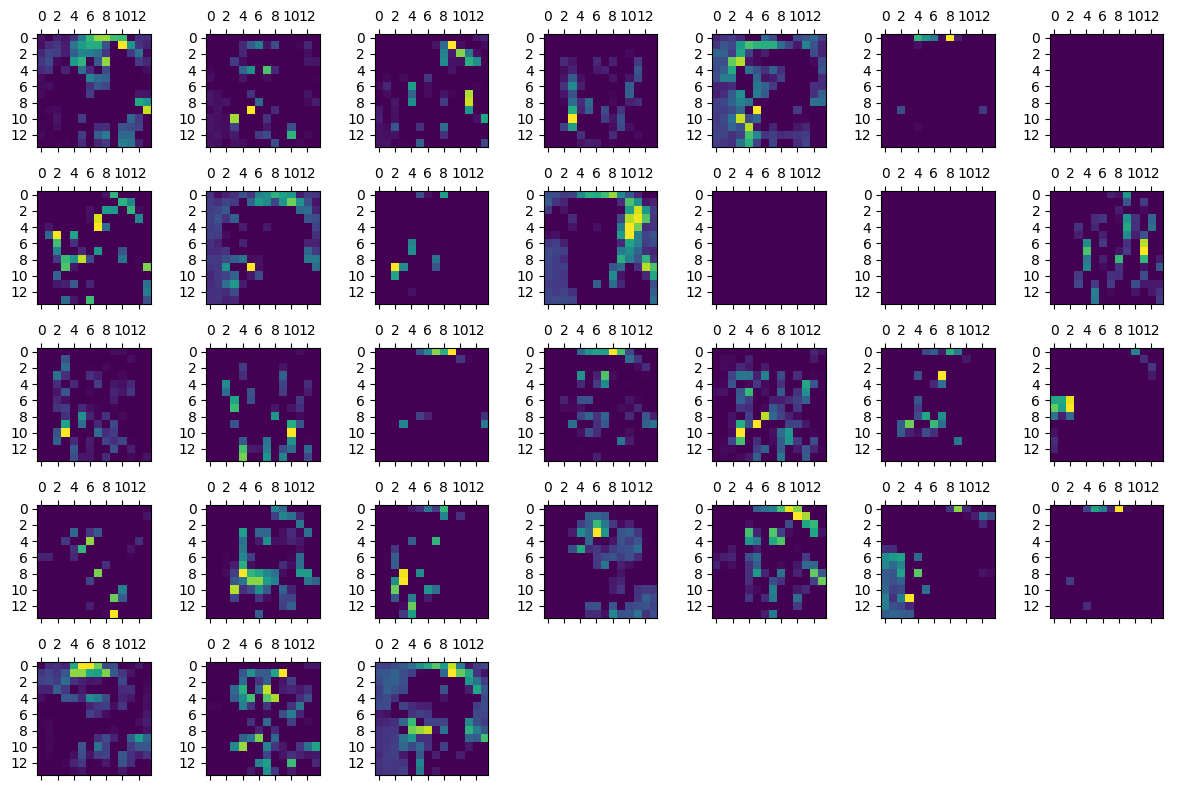

In [65]:
num_channels = 31  # Assuming you want to display 31 channels
num_rows = 5  # Number of rows in the grid
num_cols = 7  # Number of columns in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < num_channels:
        ax.matshow(network_output[3][0, :, :, i], cmap='viridis')
    else:
        ax.axis('off')  # Turn off the empty subplots

plt.tight_layout()
plt.show()